<h4>I used Claude, Anthropic's model to help with the code portion of this assignment.</h4>
<h4>I used Copilot for help understanding these concepts.</h4>

#### (1) 
Collect time series data on at least three variables that you think might be related. (You can find macroeconomics stuff from FRED, or energy stuff from the EIA.) Email me if you are having trouble thinking of a series to use. Plot the data together. 
Make sure units are comparable or use secondary axes to make it looks good. 
Perform and interpret Augmented Dickay-Fuller tests on the data, choosing a model based on visual inspection of the data. 
Estimate a vector autoregression (VAR) using differences and/or levels based on the results of the ADF tests, 
and produce a forecast using the results of the VAR.

##### Indeed Hiring Lab is the source of these selected datasets

Job Postings on Indeed in the United States: https://fred.stlouisfed.org/series/IHLIDXUS

Software Development Job Postings on Indeed in the United States: https://fred.stlouisfed.org/series/IHLIDXUSTPSOFTDEVE

Job Postings on Indeed in Utah: https://fred.stlouisfed.org/series/IHLIDXUSUT

These datasets followed a similar trend so I think they are definitely related to each other.

In [65]:
# TODO import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [66]:
df_jobs_usa = pd.read_csv('../datasets/assignment8/job_usa.csv')
df_jobs_usa_sd = pd.read_csv('../datasets/assignment8/softwaredev_job_usa.csv')
df_jobs_ut = pd.read_csv('../datasets/assignment8/job_utah.csv')

for df in [df_jobs_usa, df_jobs_usa_sd, df_jobs_ut]:
    df['date'] = pd.to_datetime(df['observation_date'])
    df.set_index('observation_date', inplace=True)
    df.drop(columns='date', inplace=True)



In [68]:
df_jobs_usa.head(5)
df_jobs_usa_sd.head(5)
df_jobs_ut.head(5)

print('Jobs USA: \n', df_jobs_usa.head(5))
print('Jobs USA Software Dev: \n', df_jobs_usa_sd.head(5))
print('Jobs UT: \n', df_jobs_ut.head(5))

print(df_jobs_usa.info())
print(df_jobs_usa_sd.info())
print(df_jobs_ut.info())

Jobs USA: 
                   IHLIDXUS
observation_date          
2020-10-24           91.10
2020-10-25           91.22
2020-10-26           91.28
2020-10-27           91.35
2020-10-28           91.39
Jobs USA Software Dev: 
                   IHLIDXUSTPSOFTDEVE
observation_date                    
2020-10-24                     78.73
2020-10-25                     78.95
2020-10-26                     79.01
2020-10-27                     79.10
2020-10-28                     79.22
Jobs UT: 
                   IHLIDXUSUT
observation_date            
2020-10-24             93.16
2020-10-25             93.38
2020-10-26             93.57
2020-10-27             93.65
2020-10-28             93.68
<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 2020-10-24 to 2025-10-24
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IHLIDXUS  1827 non-null   float64
dtypes: float64(1)
memory usage: 28.5+ KB
None
<class 'pandas.core.f

In [69]:
print(df_jobs_usa.index.min(), df_jobs_usa.index.max())
df_jobs_usa_sd.index
df_jobs_usa.index
df_jobs_ut.index

2020-10-24 2025-10-24


Index(['2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
       '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02',
       ...
       '2025-10-15', '2025-10-16', '2025-10-17', '2025-10-18', '2025-10-19',
       '2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24'],
      dtype='object', name='observation_date', length=1827)

In [ ]:
df_jobs_usa.index = pd.to_datetime(df_jobs_usa.index)
df_jobs_usa_sd.index = pd.to_datetime(df_jobs_usa_sd.index)
df_jobs_ut.index = pd.to_datetime(df_jobs_ut.index)

print(type(df_jobs_usa.index))
print(type(df_jobs_usa_sd.index))
print(type(df_jobs_ut.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


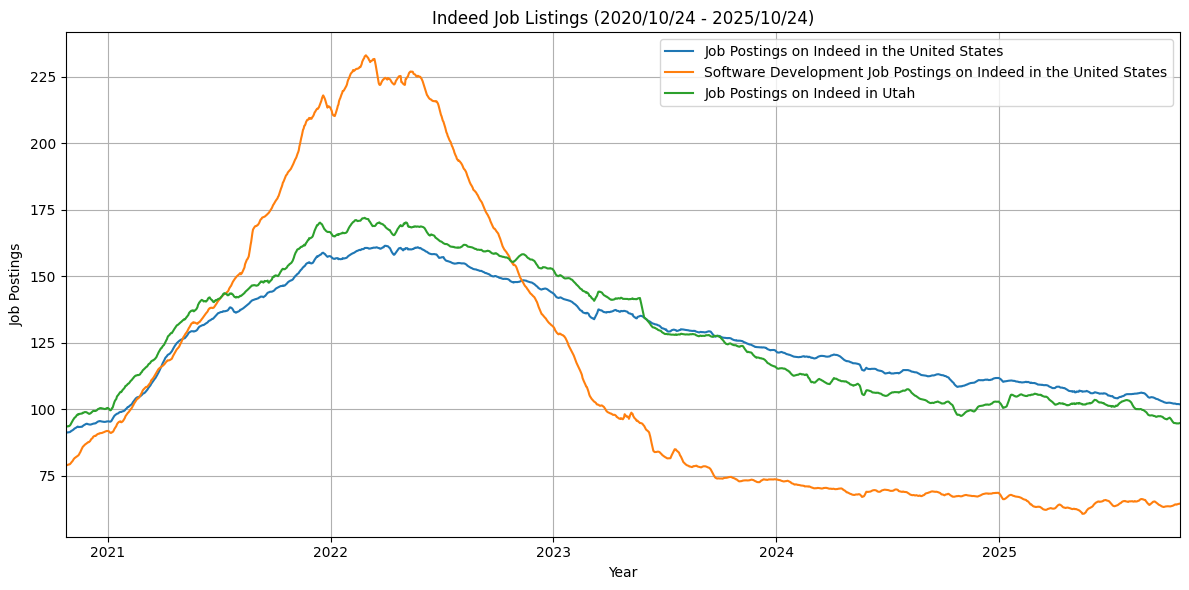

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.figure(figsize=(12, 6))

plt.plot(df_jobs_usa.index, df_jobs_usa['IHLIDXUS'], label='Job Postings on Indeed in the United States')
plt.plot(df_jobs_usa_sd.index, df_jobs_usa_sd['IHLIDXUSTPSOFTDEVE'], label='Software Development Job Postings on Indeed in the United States')
plt.plot(df_jobs_ut.index, df_jobs_ut['IHLIDXUSUT'], label='Job Postings on Indeed in Utah')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlim(pd.Timestamp('2020-10-24'), pd.Timestamp('2025-10-24'))

plt.title("Indeed Job Listings (2020/10/24 - 2025/10/24)")
plt.xlabel("Year")
plt.ylabel("Job Postings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# There we go! okay. time to actually do the real computations.